In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import time

2022-11-01 10:06:37.918735: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-01 10:06:37.924464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-01 10:06:37.924487: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# 图片的地址
path = "./dogdog.png"

In [3]:
# 定义一个函数load_preprosess_image()读取图片并且把图片解码为三通道的图片
def load_preprosess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels = 3)#解码的过程，还原为3个通道的图片
    image = tf.image.rgb_to_grayscale(image)
    return image

In [4]:
img = load_preprosess_image(path)#读取图片

2022-11-01 10:07:12.890484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-01 10:07:12.890563: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-01 10:07:12.890632: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-11-01 10:07:12.893296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


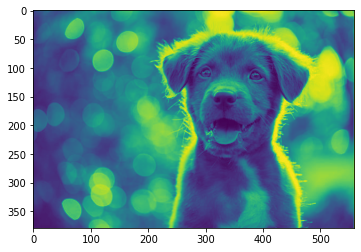

In [5]:
plt.imshow(img)

# 池化操作

In [6]:
strides = 2
img.shape[0]//strides,img.shape[1]//strides  #磁化整除讲图片大小缩小

(189, 280)

In [7]:
img_new = np.zeros([img.shape[0]//strides,img.shape[1]//strides,img.shape[2]])
img_new1 = np.zeros([img.shape[0]//strides,img.shape[1]//strides,img.shape[2]])

## 平均池化

In [ ]:
%%time
for i in range(0,img.shape[0]//strides*strides,strides):
    for j in range(0,img.shape[1]//strides*strides,strides):## img.shape[1]//strides*strides将不能整除的去掉
        for k in range(img.shape[2]):
            img_new1[i//strides,j//strides,k]=np.average([img[i,j,k],img[i+1,j,k],img[i,j+1,k],img[i+1,j+1,k]])

In [8]:
# 10-27日的代码
# %%time
def pool_mean(img,size=2):
    img_mean = np.zeros([img.shape[0]//size,img.shape[1]//size,img.shape[2]])
    for i in range(0,img.shape[0]//size*size,size):
        for j in range(0,img.shape[1]//size*size,size):
            for k in range(img.shape[2]):
                sum=0
                for m in range(size):
                    for n in range(size):
                        sum+=img[i+m,j+n,k]/size/size   #防止uint8溢出
                img_mean[i//size,j//size,k] = sum      #   /size/size(10月31日更改的代码)
    return img_mean

In [9]:
%%time
img_mean = pool_mean(img)

CPU times: user 1min 25s, sys: 19.9 ms, total: 1min 25s
Wall time: 1min 25s


## 最大池化

In [ ]:

%%time
for i in range(0,img.shape[0]//strides*strides,strides):
    for j in range(0,img.shape[1]//strides*strides,strides):
        for k in range(img.shape[2]):
            img_new[i//strides,j//strides,k]=max([img[i,j,k],img[i+1,j,k],img[i,j+1,k],img[i+1,j+1,k]])

In [10]:
# 10-27日的代码
def pool_max(img,size=2):
    img_max = np.zeros([img.shape[0]//size,img.shape[1]//size,img.shape[2]])
    for i in range(0,img.shape[0]//size*size,size):
        for j in range(0,img.shape[1]//size*size,size):
            for k in range(img.shape[2]):
                maxx = 0
                for m in range(size):
                    for n in range(size):
                        maxx = max(img[i+m,j+n,k],maxx)
                img_max[i//size,j//size,k] = maxx
    return img_max


In [11]:
%%time
img_max = pool_max(img)

CPU times: user 41.5 s, sys: 3.68 ms, total: 41.5 s
Wall time: 41.6 s


In [12]:
img_mean.shape,img_max.shape,img.shape

((189, 280, 1), (189, 280, 1), TensorShape([379, 560, 1]))

Text(0.5, 1.0, 'original')

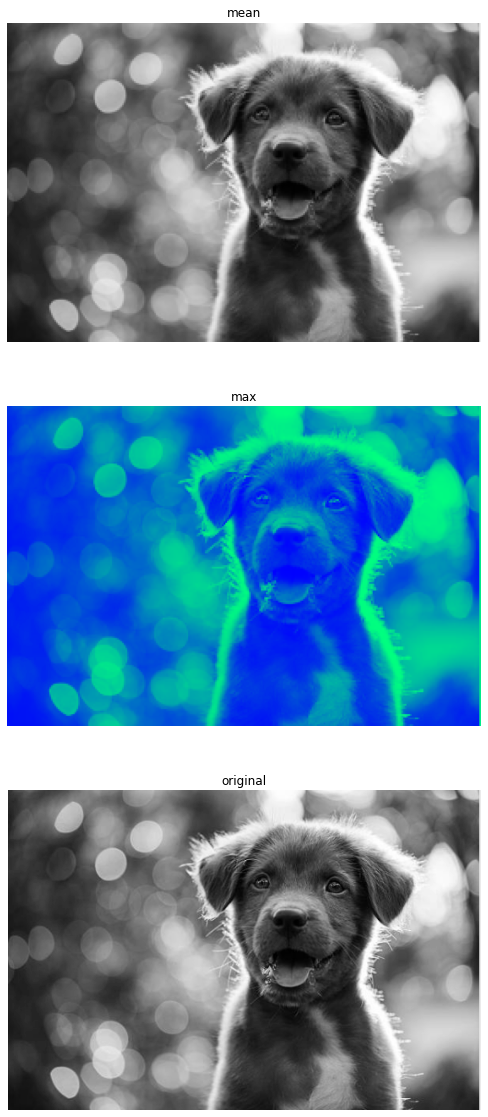

In [13]:
plt.figure(figsize=(15,20))
# fig,ax=plt.subplots(3,1)
# ax[0].figure(figsize=(25,9))
plt.subplot(311)
# plt.imshow(img_mean,cmap="gray")
plt.imshow(img_mean,cmap='gray')
plt.axis('off')
plt.title("mean")

plt.subplot(312)
plt.imshow(img_max,cmap="winter")
plt.axis('off')
plt.title("max")

plt.subplot(313)
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("original")

# camp 的参数选择：'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# 卷积操作

In [14]:
def cov33(a,b,c=1,f=3):
    t1 = np.zeros([a.shape[0]-2,a.shape[1]-2,c])
    for i in range(a.shape[0]-2):
        for j in range(a.shape[1]-2):
            for m in range(c):
                for k in range(f):
                    for l in range(f):
                        t1[i,j,m]+=a[i+k,j+l]*b[k,l]
    return t1

In [15]:
def covn33(a,b,c=1,f=3):
    temp = np.zeros([a.shape[0]-2,a.shape[1]-2,img.shape[2]])
    for i in range(a.shape[0]-2):
        for j in range(a.shape[1]-2):
            for k in range(c):
                temp[i,j,k]=np.vdot(a[i:i+f,j:j+f],b)
    return temp

In [16]:
a = img

In [17]:
b1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])#卷积核

In [18]:
%%time
t1 = covn33(a,b1)

CPU times: user 40.8 s, sys: 3.73 ms, total: 40.8 s
Wall time: 40.9 s


(-0.5, 557.5, 376.5, -0.5)

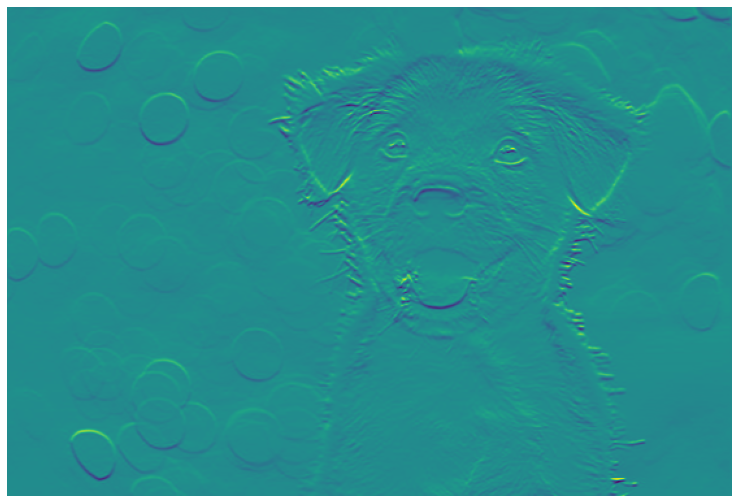

In [19]:
plt.figure(figsize=(25,9))
plt.imshow(t1)
plt.axis("off")